Traitement de theta 1/1 : 100.0% terminé
TM_pretransposee shape: (1, 300)
TM_shape :   (300, 1)
desired_output_field shape is  (300,)
TM shape est (300, 1)
La forme de TM dans pc: (300, 1)
phase_input.shape = (1,)


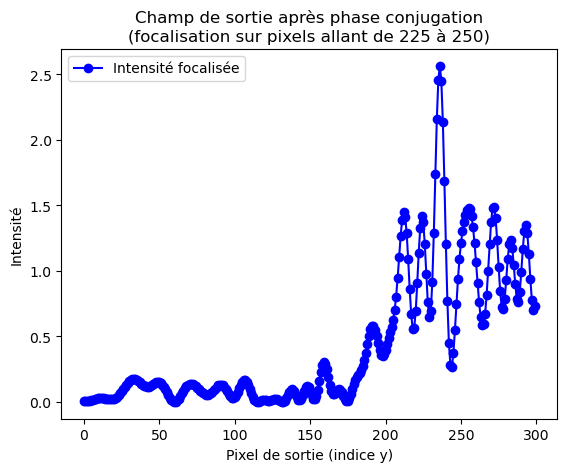

In [ ]:
# notebook_executer.ipynb

from simulation_classes import DipoleSimulation, PhaseConjugation
import numpy as np
import matplotlib.pyplot as plt

# Définition des angles d'incidence
theta_vals = np.linspace(-np.pi/5, np.pi/5, num=1)

sim = DipoleSimulation(Nb_particule=100, W=3, L=1, k_in=25, N_x=100, N_y=300)

N_obs_y = 300

# Construction de tm pré-transposée
TM_pre = sim.build_TM(theta_vals, N_obs_x=100, N_obs_y = 300 )
TM = TM_pre.T
#print("TM_pretransposee shape:", TM_pre.shape)
#print("TM_shape :  " , TM.shape)  # devrait être (N_input, N_obs_y)


desired_output = np.zeros(N_obs_y, dtype=complex)
#print("desired_output_field shape is " , desired_output.shape)
numero_pixel_foca1 = 225
numero_pixel_foca2 = 250 
desired_output[numero_pixel_foca1 : numero_pixel_foca2] = 1.0

pc = PhaseConjugation(TM_pre)
#print("La forme de TM dans pc:", pc.TM.shape)


# Calcul du champ d'entrée l
input_field = pc.compute_input_field(desired_output)
phase_input = pc.phase_only(input_field)
#print("phase_input.shape =", phase_input.shape)


# Calcul du champ de sortie focalisé 
focused_output = pc.compute_focused_output(phase_input)

# Affichage du profil d'intensité le long de la colonne de sortie (axe y)
plt.figure()
plt.plot(np.arange(N_obs_y), np.abs(focused_output)**2, 'bo-', label='Intensité focalisée')
plt.xlabel('Pixel de sortie (indice y)')
plt.ylabel('Intensité')
plt.title('Champ de sortie après phase conjugation\n(focalisation sur pixels allant de {} à {})'.format(numero_pixel_foca1, numero_pixel_foca2))

plt.legend()
plt.show()


In [3]:
!jupyter nbconvert --to python simulation_classes.ipynb


[NbConvertApp] Converting notebook simulation_classes.ipynb to python
[NbConvertApp] Writing 6226 bytes to simulation_classes.py
